<a href="https://colab.research.google.com/github/Den9p/MO_2/blob/main/%D0%9A%D1%83%D0%B2%D1%88%D0%B0%D0%BD%D0%BE%D0%B2%2C_%D0%9F%D0%BE%D0%BB%D1%8F%D1%80%D1%83%D1%88%2C_%D0%A7%D0%B5%D0%BF%D0%B0%D0%BA_%D0%A2%D1%8E%D0%BC%D0%93%D0%A3_%D0%9C%D0%9E2_%D0%94%D0%97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки для работы 2

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil

Загружаем датасет

In [110]:
import kagglehub

# Загрузка последней версии датасета
path = kagglehub.dataset_download("ayushtankha/70k-job-applicants-data-human-resource")
print("Path to dataset files:", path)

# Определяем целевой путь
target_path = os.path.join(os.getcwd(), '1')

# Проверяем, существует ли целевой путь, если да - удаляем
if os.path.exists(target_path):
    shutil.rmtree(target_path)

# Перемещаем датасет в текущую рабочую директорию
shutil.move(path, target_path)
print(f"Dataset moved to: {target_path}")

100%|██████████| 2.02M/2.02M [00:00<00:00, 40.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ayushtankha/70k-job-applicants-data-human-resource/versions/1
Dataset moved to: /content/1


Загружаем данные

In [111]:
df = pd.read_csv('/content/1/stackoverflow_full.csv')

Посмотрим на данные

In [4]:
df.describe()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,36730.500000,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,21206.797075,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,18365.250000,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,36730.500000,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,55095.750000,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,73461.000000,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


Проверим есть ли пустые значения

In [6]:
df.isnull()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0


Есть 63 пустых значения в колонке "Технологии, с которыми работали"

Посчитаем сколько это будет в процентах от общего количества записей

In [100]:
(100* df.isnull().sum() / len(df))['HaveWorkedWith']

0.08575862350603033

Меньше процента

Посмотрим на эти записи

In [101]:
df[df['HaveWorkedWith'].isnull()]

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
1161,1161,>35,No,Undergraduate,1,Man,Yes,Dev,36,32,Switzerland,96566.0,NaN,0,0
2443,2443,>35,No,Other,1,Man,No,Dev,7,6,United States of America,85000.0,NaN,0,0
2533,2533,>35,No,PhD,1,Man,No,NotDev,37,0,Germany,76020.0,NaN,0,0
2657,2657,<35,No,Master,0,Woman,No,Dev,11,5,Portugal,31428.0,NaN,0,0
5797,5797,<35,No,Undergraduate,1,Man,No,Dev,8,4,India,70368.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,69865,<35,No,Other,1,Man,No,Dev,0,0,Colombia,6036.0,NaN,0,0
71795,71795,<35,No,Undergraduate,1,Man,No,Dev,7,3,Bangladesh,5460.0,NaN,0,0
72153,72153,>35,Yes,Other,1,Man,No,NotDev,12,2,Germany,106644.0,NaN,0,0
72588,72588,<35,No,Other,1,Man,Yes,Dev,10,6,Spain,41058.0,NaN,0,0


Вероятно, эти данные или потеряны, или не были заполнены.

Удалим строки с пустыми значениями 'HaveWorkedWith'.

In [112]:
df.dropna(subset=['HaveWorkedWith'], inplace=True)

Проверим остались ли столбцы с пустыми значениями.

In [103]:
df.columns[df.isnull().sum() > 0]

Index([], dtype='object')

Уберем дублирующиеся индексы

In [113]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [105]:
df

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Теперь будем преобразовывать категориальные столбцы в числовые для дальнейшей работы

Преобразовываем столбец "Age"

In [114]:
df['Age'] = df['Age'].apply(lambda x: 1 if x == '<35' else 0)
df.rename(columns={'Age': 'Age: <35 Years'}, inplace=True)

In [15]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "Accessibility"

In [115]:
df['Accessibility'] = df['Accessibility'].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,0,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,0,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,0,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,0,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,0,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,0,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,0,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,1,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "EdLevel"

In [116]:
#Зависимость от уровня образования ???? - Обсудить
#Может other сделать 0?
education_mapping = {
    'NoHigherEd': 0,
    'Undergraduate': 1,
    'Master': 2,
    'PhD': 3,
    'Other': 4
}
df['EdLevel'] = df['EdLevel'].map(education_mapping)

In [19]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,0,2,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,0,1,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,0,2,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,0,1,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,0,3,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,0,1,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,0,1,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,1,1,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "Gender"

Для удобства заменим значение 'NonBinary' в столбце 'Gender' на 'Other'

In [117]:
df['Gender'] = df['Gender'].replace('NonBinary', 'Other')

In [118]:
#Может категорию NonBinary удалить? - Обсудить
#Я тоже думаю, что ее лучше удалить
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')

In [21]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,0,2,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,0,1,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,0,2,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,0,1,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,0,3,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,0,1,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,0,1,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,1,1,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "MentalHealth"

In [119]:
df['MentalHealth'] = df['MentalHealth'].apply(lambda x: 1 if x == 'Yes' else 0)

In [24]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,0,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,True,False,False
1,1,0,1,1,0,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,True,False,False
2,1,0,2,1,0,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,True,False,False
3,1,0,1,1,0,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,True,False,False
4,0,0,3,0,0,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,True,False,False
73458,0,0,1,1,0,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,True,False,False
73459,1,0,1,1,0,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,True,False,False
73460,1,1,1,1,1,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,True,False,False


Преобразовываем столбец "MainBranch"

In [120]:
df['MainBranch'] = df['MainBranch'].apply(lambda x: 1 if x == 'Dev' else 0)

In [26]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,0,1,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,True,False,False
1,1,0,1,1,0,1,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,True,False,False
2,1,0,2,1,0,1,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,True,False,False
3,1,0,1,1,0,1,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,True,False,False
4,0,0,3,0,0,0,40,30,Singapore,160932.0,C++;Python,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,True,False,False
73458,0,0,1,1,0,1,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,True,False,False
73459,1,0,1,1,0,1,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,True,False,False
73460,1,1,1,1,1,1,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,True,False,False


Преобразовываем столбец "Country"

In [121]:
threshold = 500 # Определяем порог для "редких" стран - Обсудить
# Ты тут поставил True/False может на 1/0 переделать?
country_counts = df['Country'].value_counts()
rare_countries = country_counts[country_counts < threshold].index
df['Country'] = df['Country'].apply(lambda x: 'Other' if x in rare_countries else x)
df = pd.get_dummies(df, columns=['Country'], prefix='Country')

In [122]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,...,Country_Romania,Country_Russian Federation,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkey,Country_Ukraine,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America
0,1,0,2,1,0,1,7,4,51552.0,C++;Python;Git;PostgreSQL,...,False,False,False,False,True,False,False,False,False,False
1,1,0,1,1,0,1,12,5,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,...,False,False,False,True,False,False,False,False,False,False
2,1,0,2,1,0,1,15,6,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,...,False,False,False,False,False,False,False,False,False,False
3,1,0,1,1,0,1,9,6,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,...,False,False,False,False,False,False,False,False,False,False
4,0,0,3,0,0,0,40,30,160932.0,C++;Python,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,...,False,False,False,False,False,False,False,False,False,False
73458,0,0,1,1,0,1,21,16,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,...,False,False,False,False,False,False,False,False,False,True
73459,1,0,1,1,0,1,4,3,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,...,False,False,False,False,False,False,False,False,False,False
73460,1,1,1,1,1,1,5,1,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,...,False,False,False,False,False,False,False,False,False,True


Преобразовываем столбец "Country"

In [123]:
# Обработка столбца 'HaveWorkedWith'
from collections import defaultdict

tech_counts = defaultdict(int)
for tech_list in df['HaveWorkedWith'].dropna():
    for tech in tech_list.split(';'):
        tech_counts[tech] += 1
threshold_tech = 5000  # Порог для определения редких технологий - Обсудить
def replace_rare_techs(tech_list):
    if pd.isna(tech_list):
        return tech_list
    techs = tech_list.split(';')
    techs = [tech if tech_counts[tech] >= threshold_tech else 'Other' for tech in techs]
    return ';'.join(techs)
df['HaveWorkedWith'] = df['HaveWorkedWith'].apply(replace_rare_techs)
technologies = set(tech for tech, count in tech_counts.items() if count >= threshold_tech)
technologies.add('Other')
tech_data = {f'Tech_{tech}': df['HaveWorkedWith'].apply(lambda x: 1 if tech in str(x) else 0) for tech in technologies}
tech_df = pd.DataFrame(tech_data)
df = pd.concat([df, tech_df], axis=1)
df.drop(columns=['HaveWorkedWith'], inplace=True)

Теперь выведем список столбцов, для которых существует высокая корреляция, а также высокая обратная корреляция с другими столбцами  

Корреляция между 'Age: <35 Years' и 'YearsCodePro': -0.6897


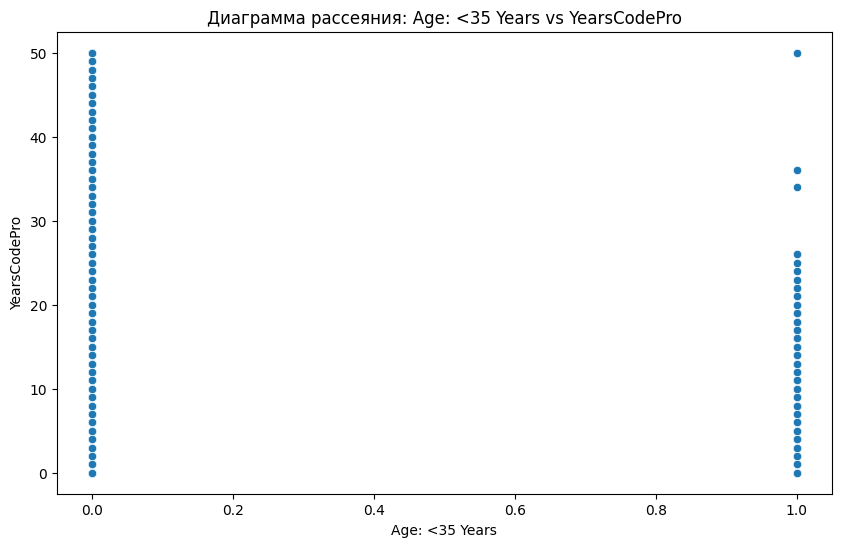


Корреляция между 'Age: <35 Years' и 'YearsCode': -0.6774


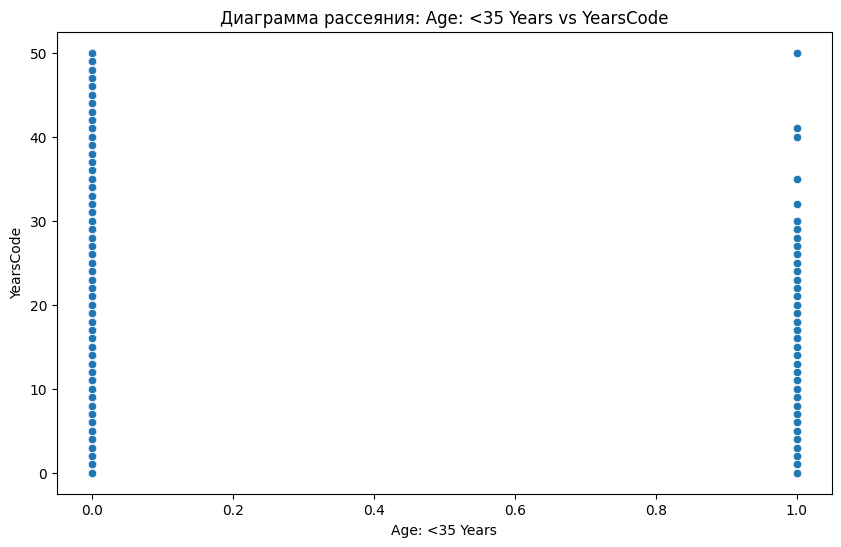


Корреляция между 'YearsCode' и 'YearsCodePro': 0.9012


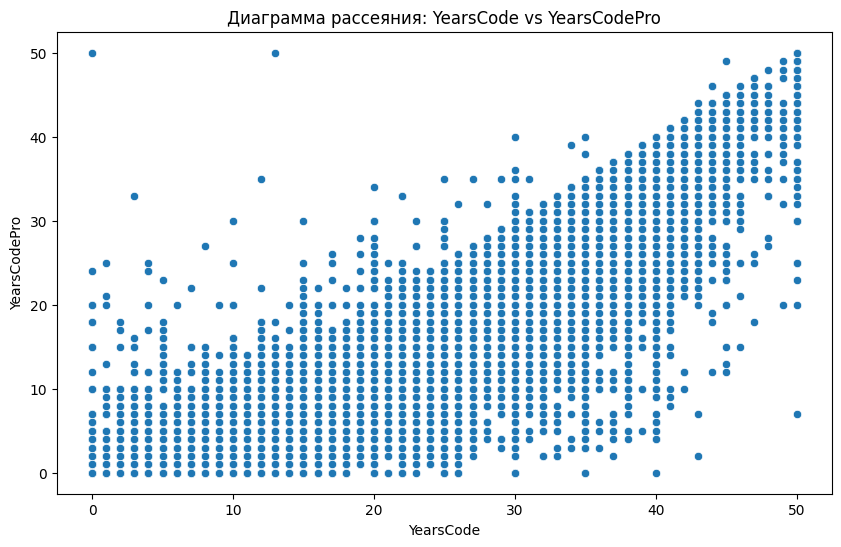


Корреляция между 'PreviousSalary' и 'Country_United States of America': 0.5662


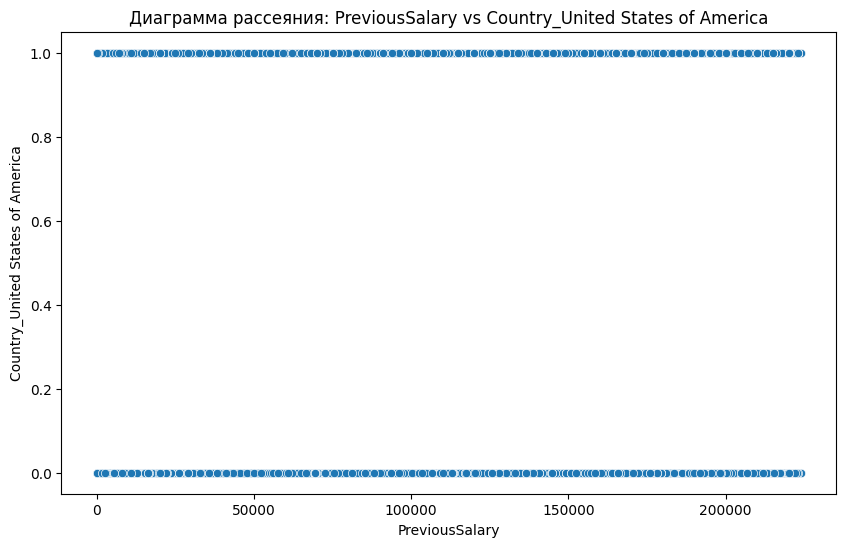


Корреляция между 'ComputerSkills' и 'Employed': 0.5850


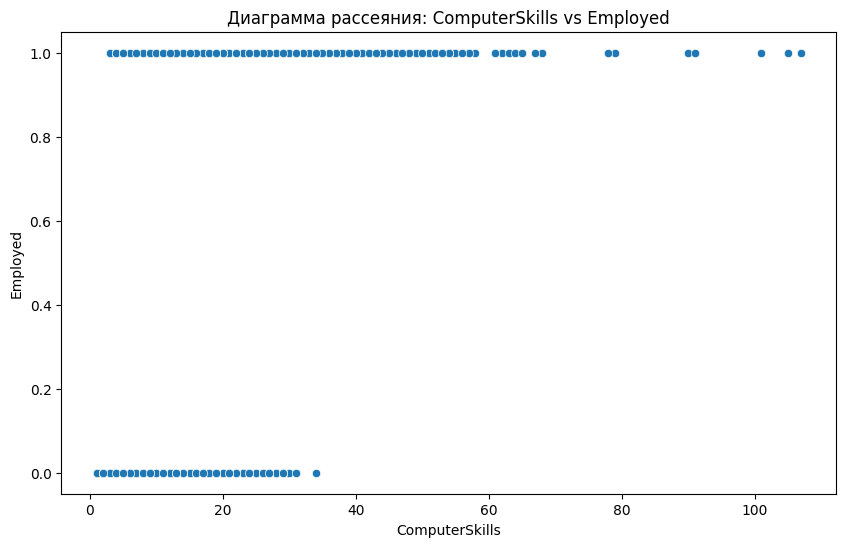


Корреляция между 'Gender_Man' и 'Gender_Woman': -0.8397


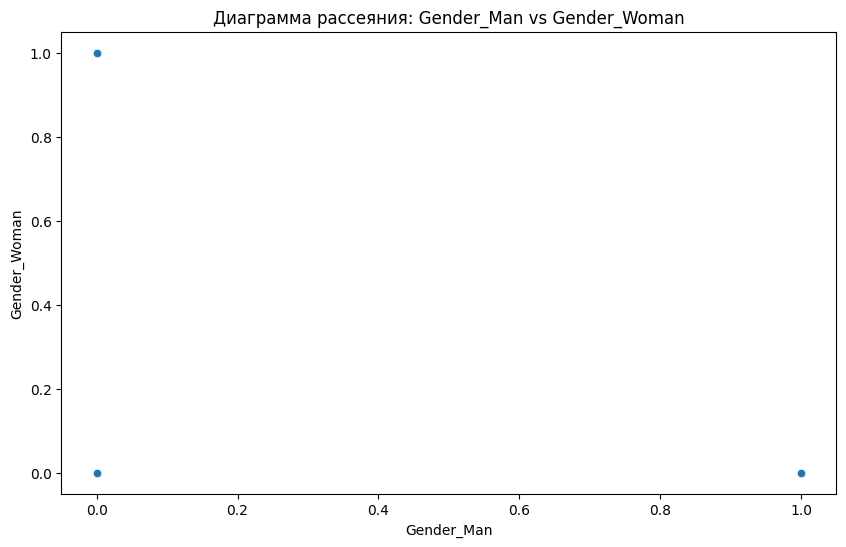


Корреляция между 'Gender_Man' и 'Gender_Other': -0.5169


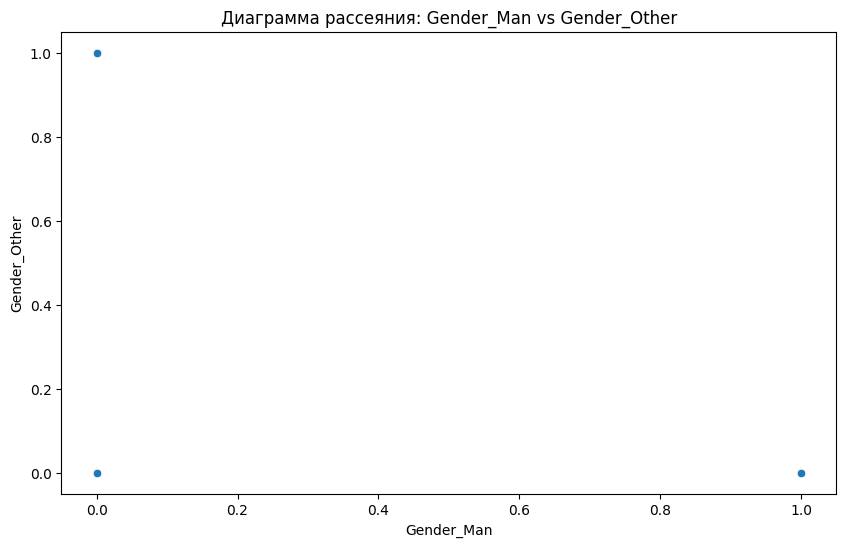


Корреляция между 'Tech_Microsoft SQL Server' и 'Tech_ASP.NET Core ': 0.5275


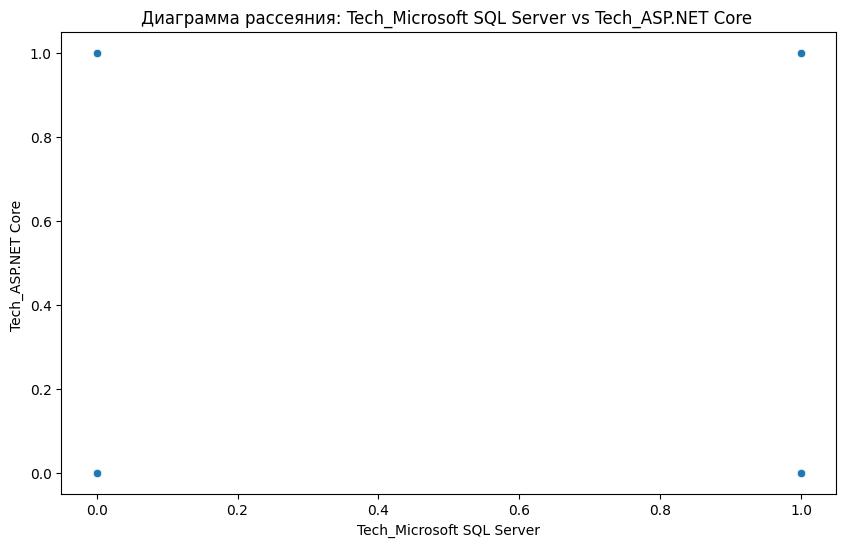


Корреляция между 'Tech_Microsoft SQL Server' и 'Tech_C#': 0.5466


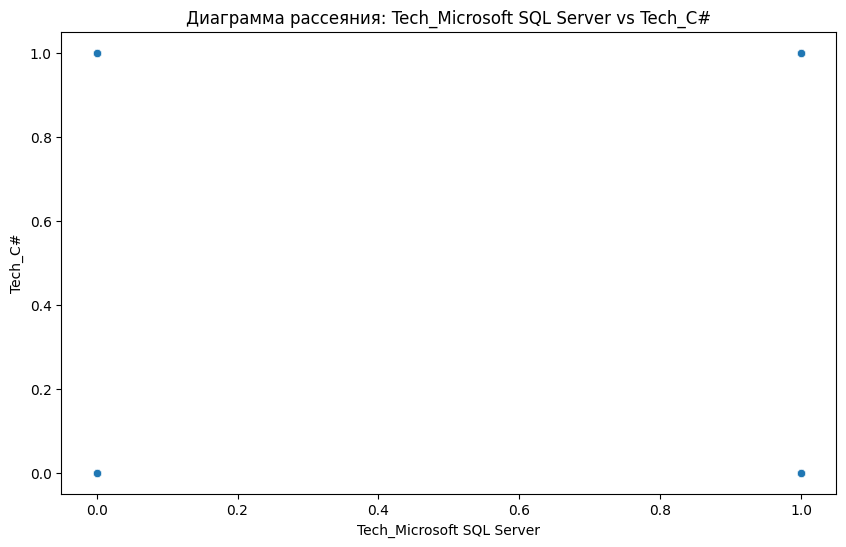


Корреляция между 'Tech_Microsoft SQL Server' и 'Tech_ASP.NET': 0.5817


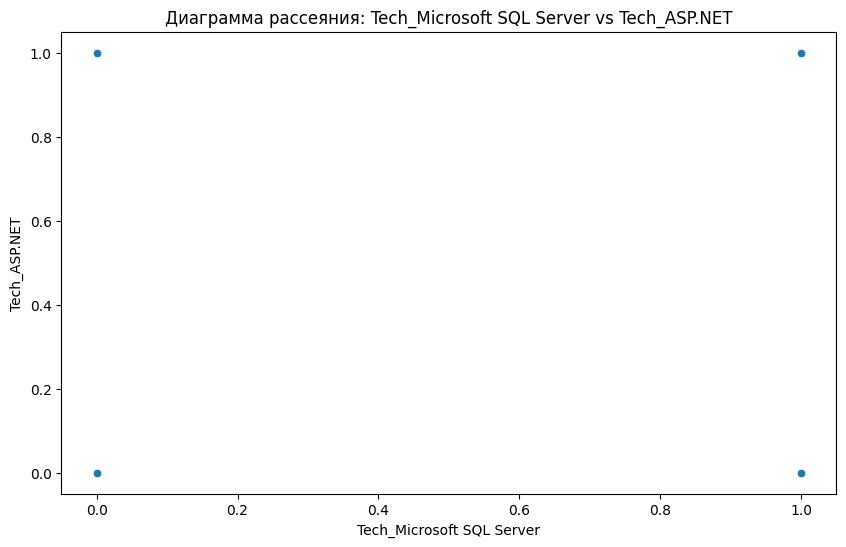


Корреляция между 'Tech_JavaScript' и 'Tech_HTML/CSS': 0.5593


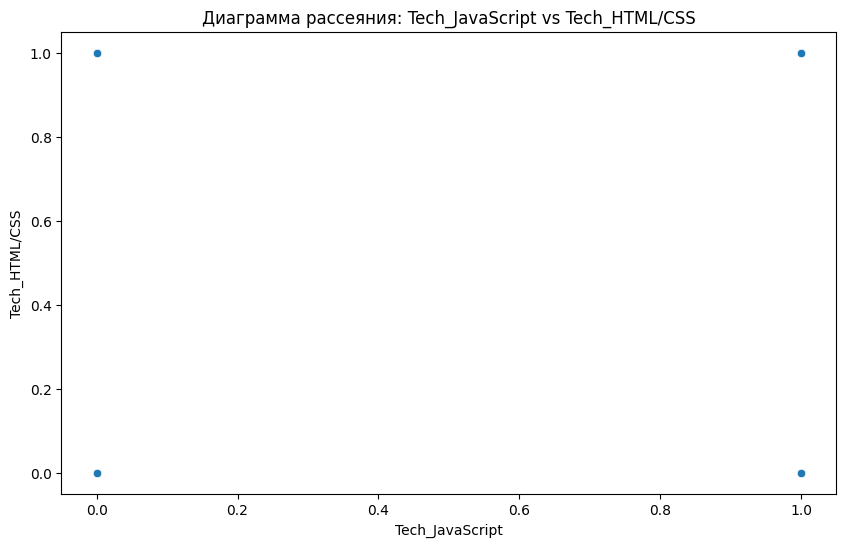


Корреляция между 'Tech_JavaScript' и 'Tech_Java': 0.7982


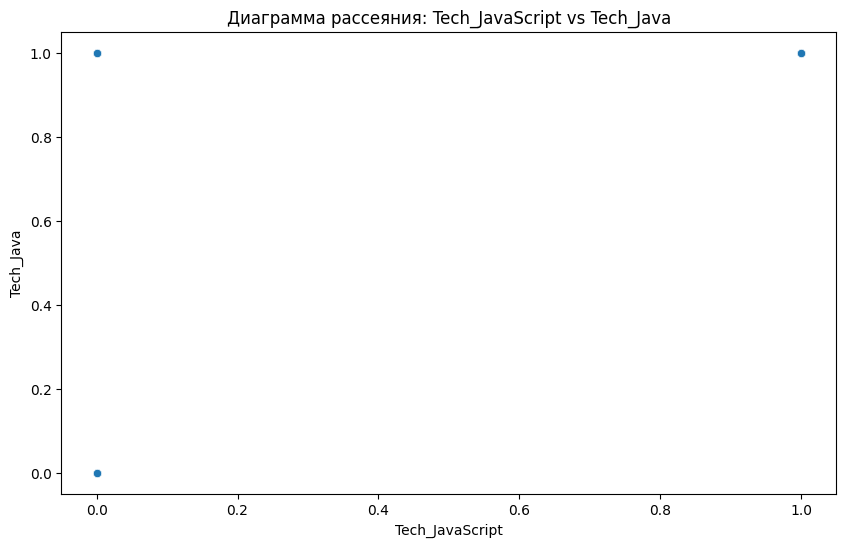


Корреляция между 'Tech_Go' и 'Tech_Google Cloud Platform': 0.5931


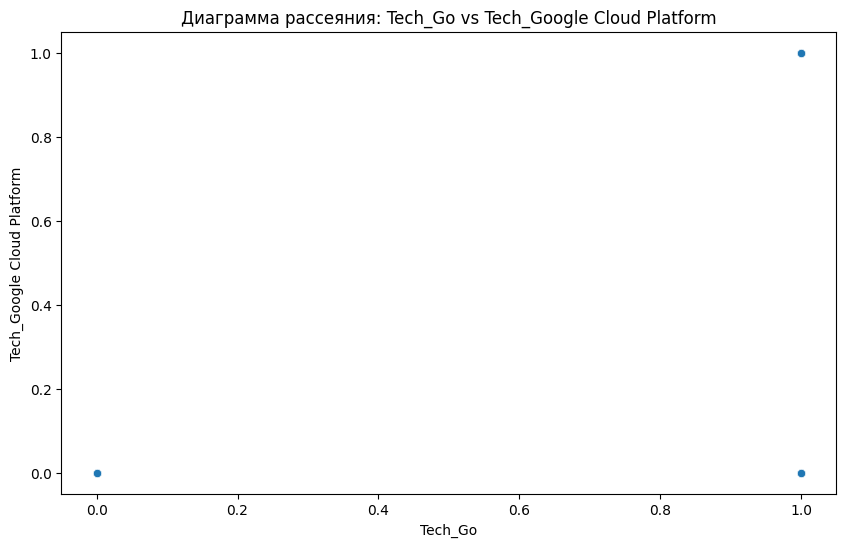


Корреляция между 'Tech_Go' и 'Tech_Google Cloud': 0.8232


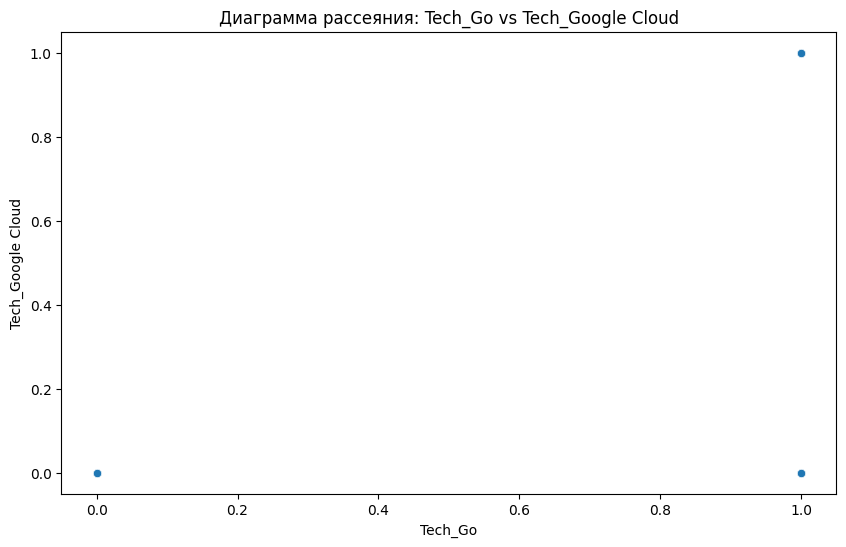


Корреляция между 'Tech_Google Cloud Platform' и 'Tech_Google Cloud': 0.7205


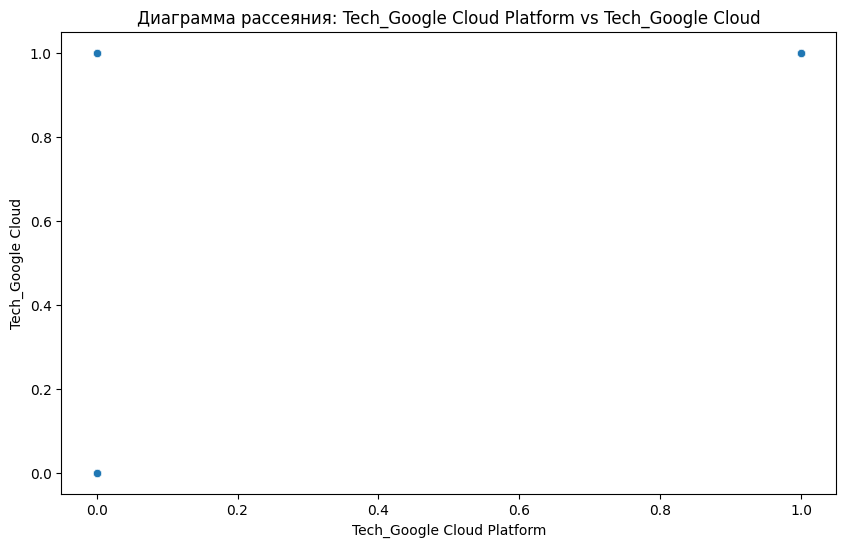


Корреляция между 'Tech_Angular' и 'Tech_Angular.js': 0.5729


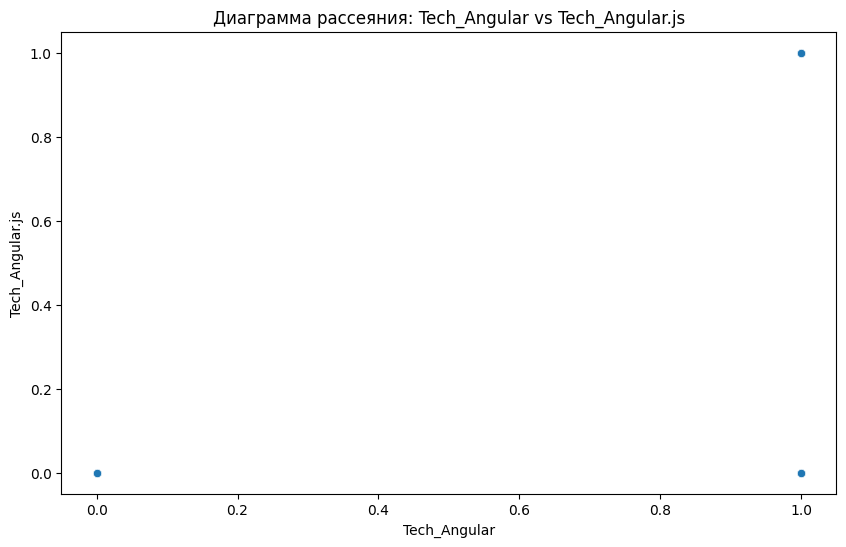


Корреляция между 'Tech_ASP.NET Core ' и 'Tech_C#': 0.6600


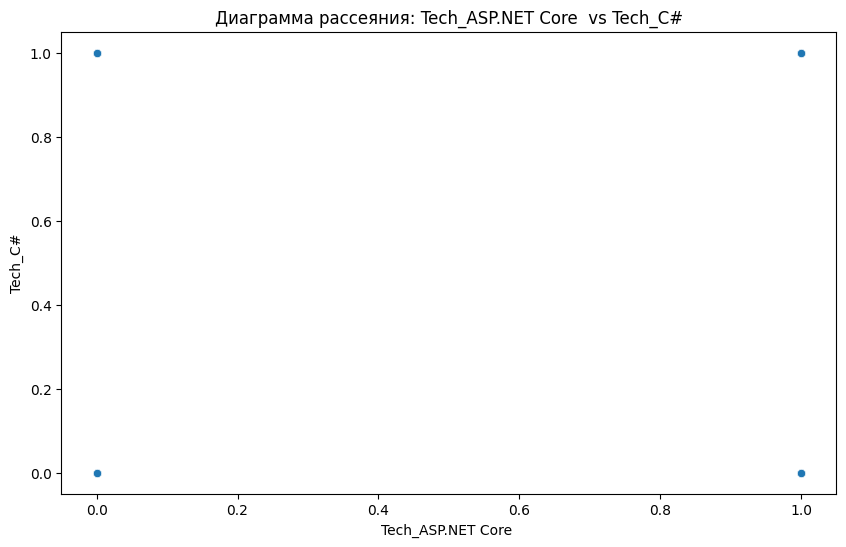


Корреляция между 'Tech_ASP.NET Core ' и 'Tech_ASP.NET': 0.8928


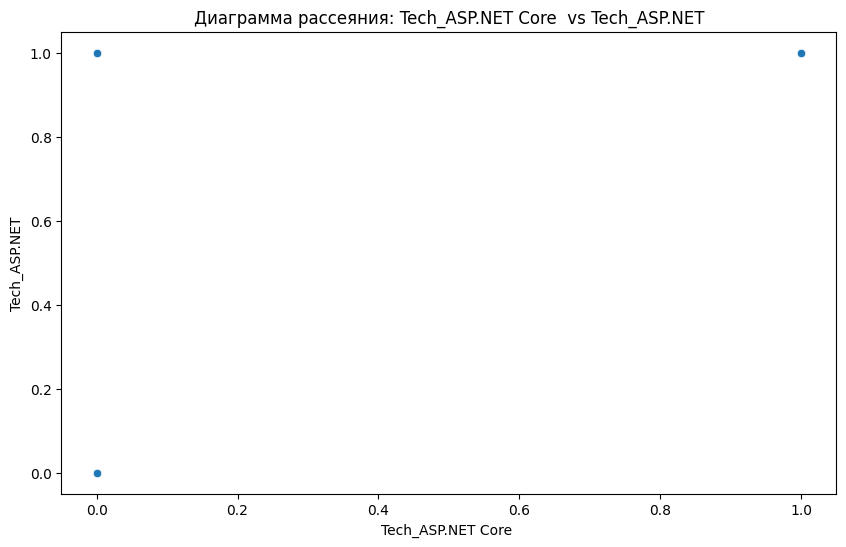


Корреляция между 'Tech_npm' и 'Tech_Git': -0.5387


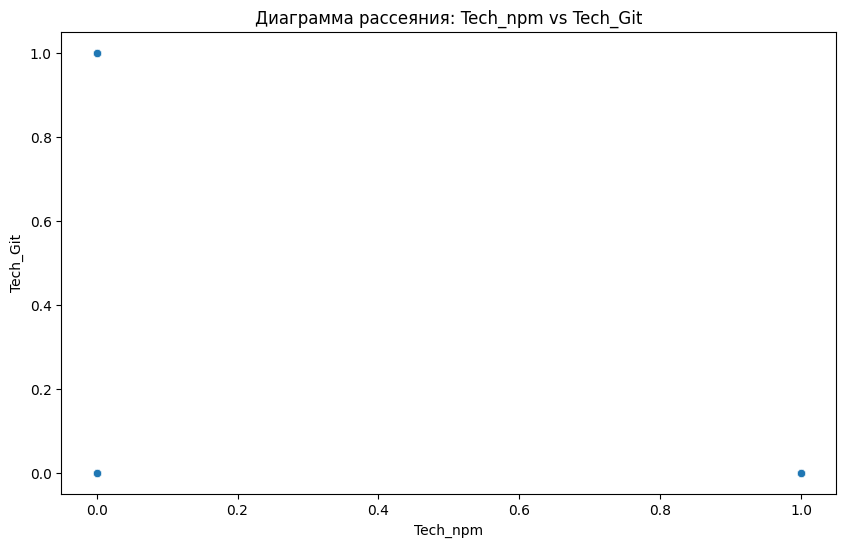


Корреляция между 'Tech_Node.js' и 'Tech_Express': 0.5270


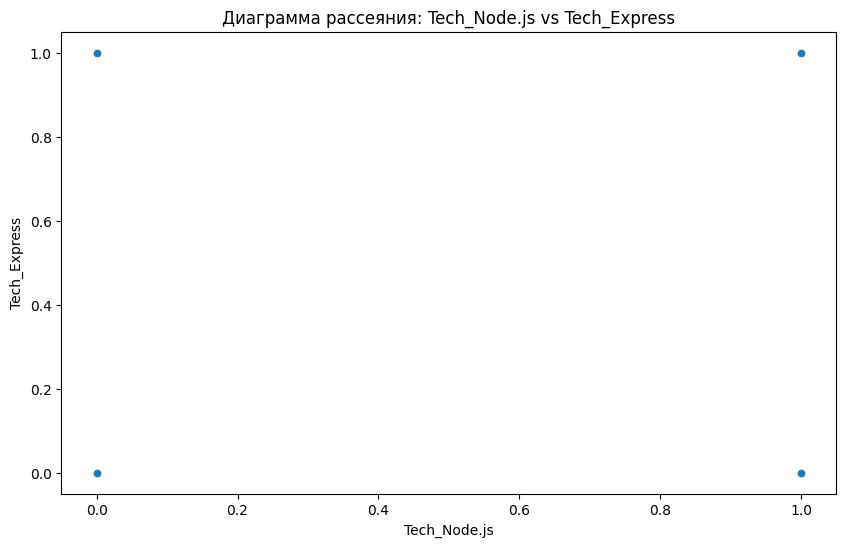


Корреляция между 'Tech_ASP.NET' и 'Tech_C#': 0.7213


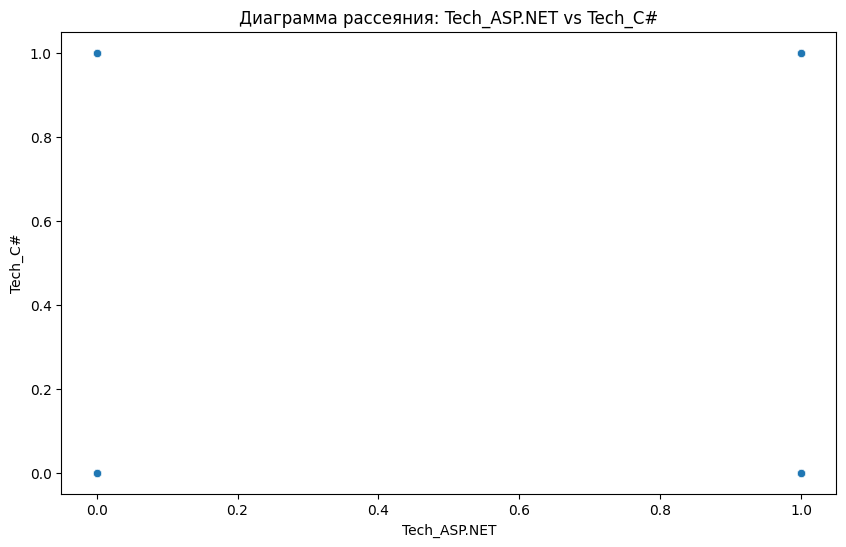


Корреляция между 'Tech_PHP' и 'Tech_Laravel': 0.5190


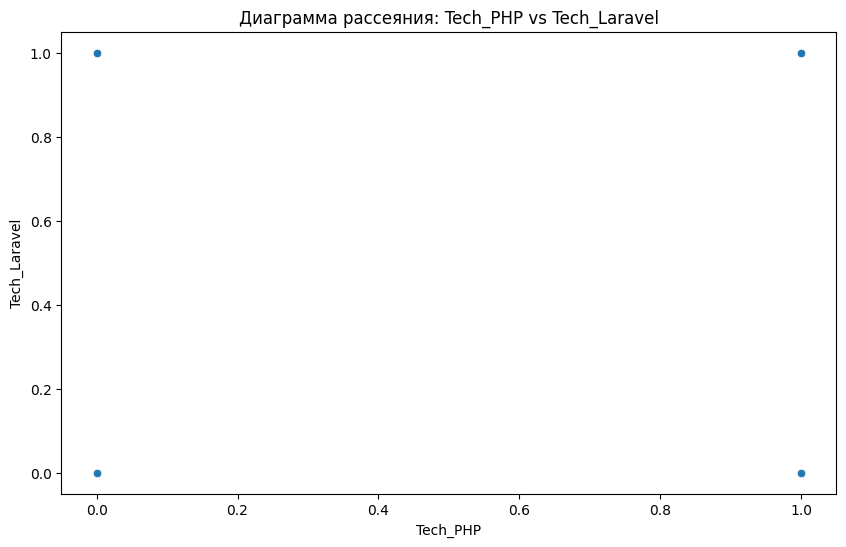


Корреляция между 'Tech_HTML/CSS' и 'Tech_C': 0.5655


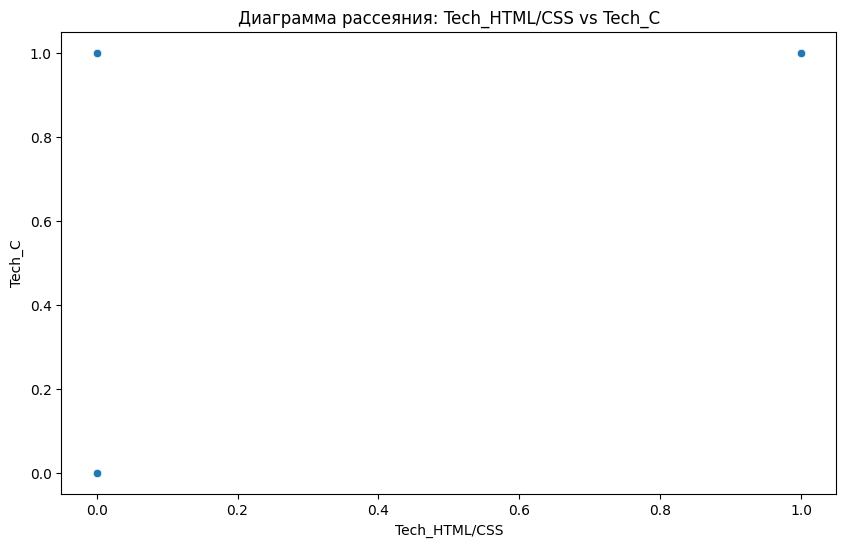

In [139]:
# Исключаем булевые столбцы
# df_numeric = df.select_dtypes(exclude=['bool'])

# Фильтруем корреляции, которые больше 0.5 или меньше -0.5
# filtr_corr = df_numeric.corr()[(df_numeric.corr() > 0.5) | (df_numeric.corr() < -0.5)]
filtr_corr = df.corr()[(df.corr() > 0.5) | (df.corr() < -0.5)]

# Устанавливаем значения на главной диагонали в NaN
np.fill_diagonal(filtr_corr.values, np.nan)

# Получаем уникальные названия столбцов, которые имеют хотя бы одну корреляцию
columns_with_high_corr = filtr_corr.columns[filtr_corr.notna().any()]

# Множество для хранения уже выведенных пар
seen_pairs = set()

# Проходим по каждому столбцу и выводим корреляции
for column in columns_with_high_corr:
    # correlations = df_numeric.corr()[column].loc[lambda x: (x > 0.5) | (x < -0.5)].sort_values().drop(column)
    correlations = df.corr()[column].loc[lambda x: (x > 0.5) | (x < -0.5)].sort_values().drop(column)
    for correlated_column, value in correlations.items():
        # Создаем упорядоченную пару для избежания дублирования
        pair = tuple(sorted([column, correlated_column]))

        # # Проверяем, являются ли оба столбца бинарными
        if pair not in seen_pairs:
        #     if (df[column].nunique() == 2 and set(df[column].unique()).issubset({0, 1})) or \
        #        (df[correlated_column].nunique() == 2 and set(df[correlated_column].unique()).issubset({0, 1})):
        #         continue  # Пропускаем пары с бинарными переменными

            seen_pairs.add(pair)
            print(f"Корреляция между '{column}' и '{correlated_column}': {value:.4f}")

            # Создаем диаграмму рассеяния
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=df[column], y=df[correlated_column])

            # Добавляем заголовок и метки осей
            plt.title(f'Диаграмма рассеяния: {column} vs {correlated_column}')
            plt.xlabel(column)
            plt.ylabel(correlated_column)

            # Отображаем график
            plt.show()
            print()  # Пустая строка для разделения выводов

In [130]:
mostcorrcol = df.corr()[columnname].drop(columnname).abs().idxmax()
print(mostcorrcol)
df.corr()[columnname][mostcorrcol]

Country_United States of America


0.5662026067590624